In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
events = pd.read_csv("event_data_train.csv", encoding = 'UTF-8', delimiter=',')
events['date'] = pd.to_datetime(events['timestamp'], unit='s')
events['day'] = events.date.dt.date
events

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


<AxesSubplot:xlabel='day'>

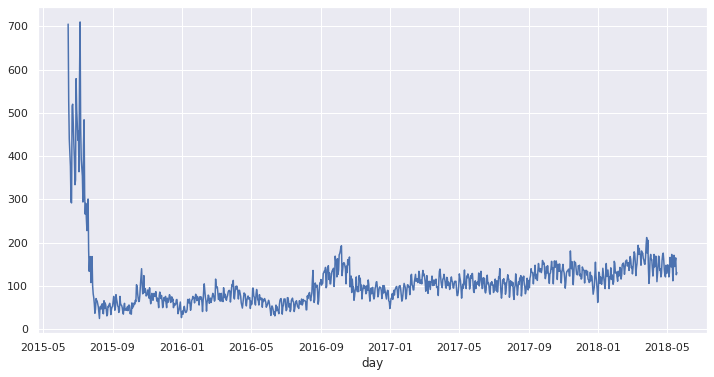

In [20]:
#узнаем сколько уникальных пользователей было каждый день
sns.set(rc={'figure.figsize':(12,6)})
events.groupby('day').user_id.nunique().plot()

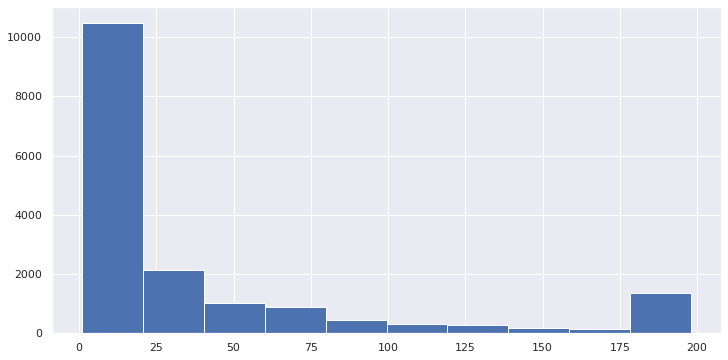

In [28]:
#посмотрим число пройденных шагов для каждого пользователя
hist = events[events.action == 'passed'].groupby('user_id',as_index=False)\
                                .agg({'step_id': 'count'})\
                                .rename(columns={'step_id':'passed_steps'})\
                                .passed_steps.hist()
#но при этом потеряны данные про тех кто не прошел ни одного шага

In [33]:
#пользователь, пользователь перешел на стэп, прошел его, начало попытки запуска, просмотр шага
events.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0) \
                  .reset_index()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [37]:
submissions = pd.read_csv("submissions_data_train.csv", encoding = 'UTF-8', delimiter=',')
submissions ['date'] = pd.to_datetime(submissions['timestamp'], unit='s')
submissions ['day'] = submissions.date.dt.date
submissions.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [43]:
#
user_scores = submissions.pivot_table(index='user_id',
                        columns='submission_status', 
                        values='step_id', aggfunc='count', fill_value=0) \
                  .reset_index()
user_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [46]:
events.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [56]:
arrarr = events[['user_id', 'timestamp','day']].drop_duplicates(subset=['user_id','day'])\
      .groupby('user_id')['timestamp'].apply(list)\
      .apply(np.diff).values

In [61]:
gap_data = pd.Series(np.concatenate(arrarr))
gap = gap_data/(24*60*60) #находим разницу в днях(между двумя соседними посещениями)

<AxesSubplot:>

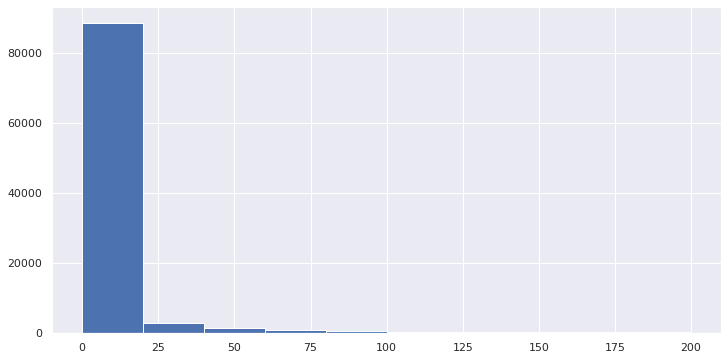

In [62]:
gap[gap<200].hist()

In [63]:
#95% пользователей не возвращаются на курс после перерыва в 2 месяца
gap.quantile(0.95)

59.760440972222156

In [64]:
#90% пользователей хватает 20 дней на перерыв
gap.quantile(0.90)

18.325995370370403

In [68]:
user_scores.sort_values(by='correct', ascending=False)

submission_status,user_id,correct,wrong
439,1046,421,513
2099,5552,186,93
6415,17135,168,177
2344,6183,142,65
3208,8461,135,42
...,...,...,...
551,1321,0,2
9778,26349,0,1
3559,9422,0,1
5014,13408,0,2


In [72]:
user_scores.sort_values(by='correct', ascending=False, na_position='first').head()

submission_status,user_id,correct,wrong
439,1046,421,513
2099,5552,186,93
6415,17135,168,177
2344,6183,142,65
3208,8461,135,42


In [76]:
user_data = events.groupby('user_id',as_index=False)\
            .agg({'timestamp':'max'})
user_data

,user_id,timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660
...,...,...
19229,26790,1517495987
19230,26793,1510225034
19231,26794,1512035039
19232,26797,1509995096


In [78]:
now = 1520978742
droped = 30 * 24 * 60 * 60

In [82]:
user_data['is_gone_user'] =  (now - user_data.timestamp) > droped
user_data

,user_id,timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,False
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,False
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [86]:
user_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [95]:
users_data = user_data.merge(user_scores, on='user_id', how='outer')
users_data=users_data.fillna(0)
users_data

,user_id,timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,False,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,False,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0
